In [42]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_dir = "E:\\Machine Learning\\flowers-recognition\\flowers"

In [3]:
train_dir = data_dir + "\\train"
test_dir = data_dir + "\\test"

In [6]:
for folder in os.listdir(train_dir):
    print(folder)

daisy
dandelion
rose
sunflower
tulip


In [7]:
from matplotlib.image import imread

In [48]:
rand_daisy = os.listdir(train_dir+"\\daisy")[random.randint(0,509)] 

In [49]:
rand_daisy

'33923454163_9cabcaa733_n.jpg'

In [50]:
rand_daisy = plt.imread(train_dir+"\\daisy\\"+rand_daisy)

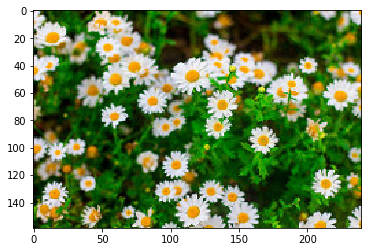

In [51]:
plt.imshow(rand_daisy)

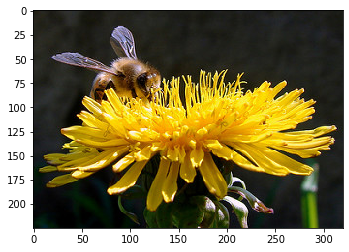

In [52]:
rand_dandelion = os.listdir(train_dir+"\\dandelion")[random.randint(0,509)]
rand_dandelion = plt.imread(train_dir+"\\dandelion\\"+rand_dandelion)
plt.imshow(rand_dandelion)

In [53]:
print(rand_daisy.shape)
print(rand_dandelion.shape)

(159, 240, 3)
(225, 320, 3)


In [35]:
dim1 = []
dim2 = []

for species in os.listdir(train_dir):
    for image_file in os.listdir(train_dir+"\\"+species):
        img = plt.imread(train_dir+"\\"+species+"\\"+image_file)
        d1,d2,colors = img.shape
        dim1.append(d1)
        dim2.append(d2)

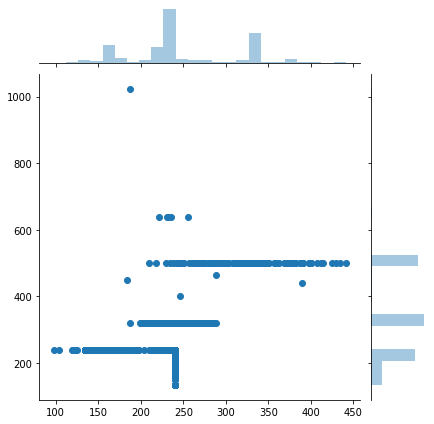

In [38]:
sns.jointplot(dim1,dim2)

In [39]:
np.mean(dim1)

249.25868342705922

In [40]:
np.mean(dim2)

330.9381409196163

In [41]:
image_shape = (250,330,3)

In [43]:
image_gen = ImageDataGenerator(rotation_range = 20,                         
                              width_shift_range=0.1,    
                              height_shift_range=0.1,
                               rescale=1/255,
                              shear_range= 0.1,             
                              zoom_range=0.1,              
                              horizontal_flip=True,        
                               fill_mode = 'nearest')       

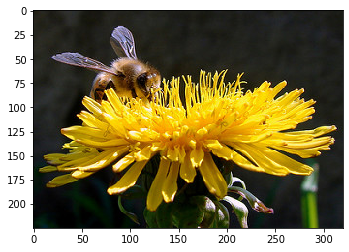

In [54]:
plt.imshow(rand_dandelion)

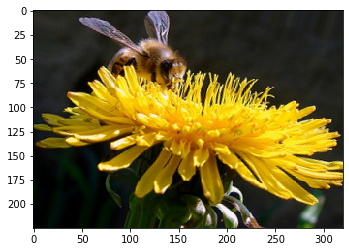

In [55]:
plt.imshow(image_gen.random_transform(rand_dandelion))

In [57]:
image_gen.flow_from_directory(train_dir)

Found 3023 images belonging to 5 classes.


In [58]:
image_gen.flow_from_directory(test_dir)

Found 1300 images belonging to 5 classes.


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [62]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'same',activation ='relu', input_shape = image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dense(5, activation = "softmax"))

In [63]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 250, 330, 32)      2432      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 125, 165, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 165, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 82, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 62, 82, 96)        55392     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 41, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 31, 41, 96)       

In [65]:
batch_size = 32

In [67]:
train_image_gen = image_gen.flow_from_directory(train_dir,target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 3023 images belonging to 5 classes.


In [68]:
test_image_gen = image_gen.flow_from_directory(test_dir,target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                              shuffle=False)

Found 1300 images belonging to 5 classes.


In [69]:
train_image_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}